# Проксимальный метод

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import sklearn.preprocessing as skprep

In [3]:
matplotlib.use('Agg')
params = {'legend.fontsize': 20,
          'legend.handlelength': 4,
          "axes.labelsize": 45,
          "xtick.labelsize": 25,
          "ytick.labelsize": 25,
          "lines.linewidth": 4,
           "axes.titlesize":30}
matplotlib.rcParams.update(params)

"Многие методы первого порядка (методы градиентного типа) основаны на использовании квадратичной функции (параболоида вращения) в качестве оптимизации модели. Однако необязательно рассматривать именно параболоиды вращения. Можно использовать и другие функции, которые позволяют построить более точную локальную модель целевой функции задачи в рассматриваемой точке, что приводит в итоге к увеличению скорости сходимости метода. Здесь можно выделить два направления. Первое направление связано с использованием старших производных в модели функции, а второе — с занесением в модель части постановки задачи. Например, если оптимизируемая функция есть сумма гладкой и негладкой функций, то первую можно заменять параболоидом вращения в модели, а вторую оставить как есть. Насколько нам известно, по такому подходу до последнего момента имелись лишь разрозненные результаты."
Источник: Р. Ф. Хильдебранд, Е. А. Воронцова, А. В. Гасников, Ф. С. Стонякин "Выпуклая оптимизация"

### Общее понятие проксимального оператора

Пусть $f : \mathbb{R}^n \to \mathbb{R}$ замкнутая выпуклая функция (не обязательно гладкая), т.е. её надграфик  

$$\text { epi } f=\left\{(x, t) \in \mathbf{R}^n \times \mathbf{R} \mid f(x) \leq t\right\}$$
является закрытым выпуклым множеством.

$$\operatorname{dom} f=\left\{x \in \mathbf{R}^n \mid f(x)<+\infty\right\}$$
множество точек, на которых $f$ ограничена.  

Проксимальным оператором называется функция вида:
$$\operatorname{prox}_{\alpha f}(v)=\underset{x}{\operatorname{argmin}}\left(f(x)+(1 / (2 \alpha))\|x-v\|_2^2\right)  \quad \quad (1)$$

### Проксимальный градиентный метод (Proximal gradient method)

Рассмотрим задачу:
$$
\min_x f(x) = \phi(x) + h(x)
$$
, где $\phi(x)$ - выпуклая гладкая функция, а $h(x)$ - выпуклая негладкая функция. Определим аппроксимационную подзадачу:

$$
q_\lambda(x_k)=\underset{x}{\operatorname{argmin}}\{ \phi(x_k) + \nabla \phi(x_k)^\top(x - x_k) + h(x) + (1 / 2 \lambda)\|x-x_k\|_2^2 \}$$  

Можно показать, что для такой подзадачи проксимальный оператор примет вид:  
$$x_{k+1} := \operatorname{prox}_{\lambda h}(x_k - \lambda \nabla \phi(x_k ))  \quad \quad (2)$$
Подробнее см. N. Parikh and S. Boyd. "Proximal Algorithms." с. 148    

__Примечание__ Отсюда видим, что при $h(x)=0$ получаем обычный градиентный метод  
__Примечание__ Данный метод используют для ускорения обычного субградиентного метода, так как при постоянном шаге он не сходится вблизи изломов негладких функций

## Эксперименты LASSO

Решим задачу LASSO:

$$
\min_x f(x) = \frac{1}{2}\|Ax - y \|^2_2 + \gamma \|x\|_1
$$

- $\phi(x) = \frac{1}{2}\|Ax - y \|^2_2$
- $h(x) = \gamma \|x\|_1$

**Субградиентный метод.** Сравним проксимальный метод с субградиентным методом c нормированным шагом:

$$x_{k+1} = x_k - \varepsilon \frac{\nabla f(x_k)}{\| \nabla f(x_k) \|_2}$$

, где $\varepsilon$ - желаемая точность

**Проксимальный метод.** Чтобы составить проксимальный оператор, представим $f(x)$ как композитную задачу:  
- $\phi(x) = \frac{1}{2}\|Ax - y \|^2_2$
- $h(x) = \gamma \|x\|_1$

Вычислим проксимальный оператор:
$$ 
x_{k+1} = prox_{\gamma |\cdot|} (x_k) = \begin{cases} x_k^{(i)} - \gamma & x_k^{(i)} \geq \gamma  \\ 0 & |x^{(i)}_k| \leq \gamma \\ x_k^{(i)} + \gamma & x^{(i)}_k \leq -\gamma \end{cases}
$$
Или в векторизованном виде:  
$$
x_{k+1} = \text{sign}(x)(|x| - \gamma)_+, \; |x| = (|x_1|, \ldots, |x_n|)
$$
См. проксимальный оператор для $l_1$-нормы в Parikh, Neal, and Stephen Boyd. "Proximal algorithms." Foundations and trends® in Optimization 1.3 (2014): 127-239. c. 197

**Ускоренный проксимальный метод (FISTA)** (Beck, Amir, and Marc Teboulle. "A fast iterative shrinkage-thresholding algorithm for linear inverse problems." SIAM journal on imaging sciences 2.1 (2009): 183-202.)

\begin{align*}
& y_{k+1} = x_k + w_k (x_k - x_{k-1})\\
& x_{k+1} = prox_{\alpha_k g} (y_{k+1} - \alpha_k \phi'(y_{k+1}))
\end{align*}

- $\{w_k\}$ специальная последовательность, выбранная для ускорения, например,, $w_k = \frac{k}{k+3}$
- Скорость сходимости $\mathcal{O}(1/k^2)$

Последовательность $w_k$:

$$t_{k} = \frac{1+\sqrt{1+4t_{k-1}^2}}{2}$$

$$\omega_k = \frac{t_{k-1}-1}{t_{k}}$$

In [4]:
class ProxGM:
    def __init__(self, fix_lam=None, lam0=1, beta=0.5, return_history=True, name=None):
        self.name = name
        self.return_history = return_history
        self.history = []
        self.lam0 = lam0
        self.fix_lam = fix_lam
        self.beta = beta

    def backtracking(self, x, f, gradf, g_prox):
        lam = self.lam0
        f_x = f(x)
        f_grad_x = gradf(x)
        z = g_prox(x - lam * f_grad_x, lam)
        while f(z) > f_x + np.sum(f_grad_x * (z - x)) + np.linalg.norm(z - x) ** 2 / (2 * lam):
            lam = lam * self.beta
            z = g_prox(x - lam * gradf(x), lam)
            self.lam0 = lam
            if lam <= 1e-9:
                break
        return z

    def solve(self, x0, f, gradf, g_prox, tol=1e-3, max_iter=10000):
        x = x0.copy()
        self.history = [(x, time.time())]
        for i in range(max_iter):
            if self.fix_lam is None:
                x = self.backtracking(x, f, gradf, g_prox)
            else:
                x_ = x - self.fix_lam * gradf(x)
                x = g_prox(x_, self.fix_lam)
            self.history.append((x, time.time()))
        return x

In [5]:
class AccProxGM(ProxGM):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def solve(self, x0, f, gradf, g_prox, tol=1e-3, max_iter=10000):
        x = x0.copy()
        x_prev = x.copy()
        self.history = [(x, time.time())]
        t_prev = 1
        t_next = (1 + np.sqrt(1 + 4 * t_prev ** 2)) / 2.
        for i in range(max_iter):
            w = (t_prev - 1) / t_next
            x, x_prev = x + w * (x - x_prev), x
            t_prev = t_next
            t_next = (1 + np.sqrt(1 + 4 * t_prev ** 2)) / 2.
            if self.fix_lam is None:
                x = self.backtracking(x, f, gradf, g_prox)
            else:
                x_ = x - self.fix_lam * gradf(x)
                x = g_prox(x_, self.fix_lam)
            self.history.append((x, time.time()))
        return x

In [6]:
class StepSize:
    def __call__(self, x, h, k, *args, **kwargs):
        pass

# Нормированный шаг
class ScaledConstantStepSize(StepSize):
    def __init__(self, alpha0=0.5):
        self.alpha0 = alpha0

    def __call__(self, x, h, k, gradf, f, *args, **kwargs):
        return self.alpha0 / np.linalg.norm(gradf(x))

class SubgradMethod:
    def __init__(self, StepSizeChoice, return_history=True, name=None):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        self.history = []

    def solve(self, x0, f, gradf, tol=1e-3, max_iter=5000):
        self.history = [(x0, time.time())]
        x = x0.copy()
        k = 0
        x_prev = None
        while x_prev is None or np.linalg.norm(x - x_prev) > tol:
            h = -gradf(x)
            alpha = self.StepSizeChoice(x, h, k, gradf, f)
            x_prev, x = x, x + alpha * h
            if self.return_history:
                self.history.append((x, time.time()))
            if k >= max_iter:
                break
            k += 1
        return x

### Эксперимент LASSO. Изменение размерности матрицы.

Number of nonzeros in x_true = 2
Method: Subgrad, m=250, n=70
	Number nonzeros in x* = 70
Method: ProxGM, m=250, n=70
	Number nonzeros in x* = 1
Method: AccProxGM, m=250, n=70
	Number nonzeros in x* = 1
---
Number of nonzeros in x_true = 5
Method: Subgrad, m=70, n=250
	Number nonzeros in x* = 250
Method: ProxGM, m=70, n=250
	Number nonzeros in x* = 89
Method: AccProxGM, m=70, n=250
	Number nonzeros in x* = 1
---


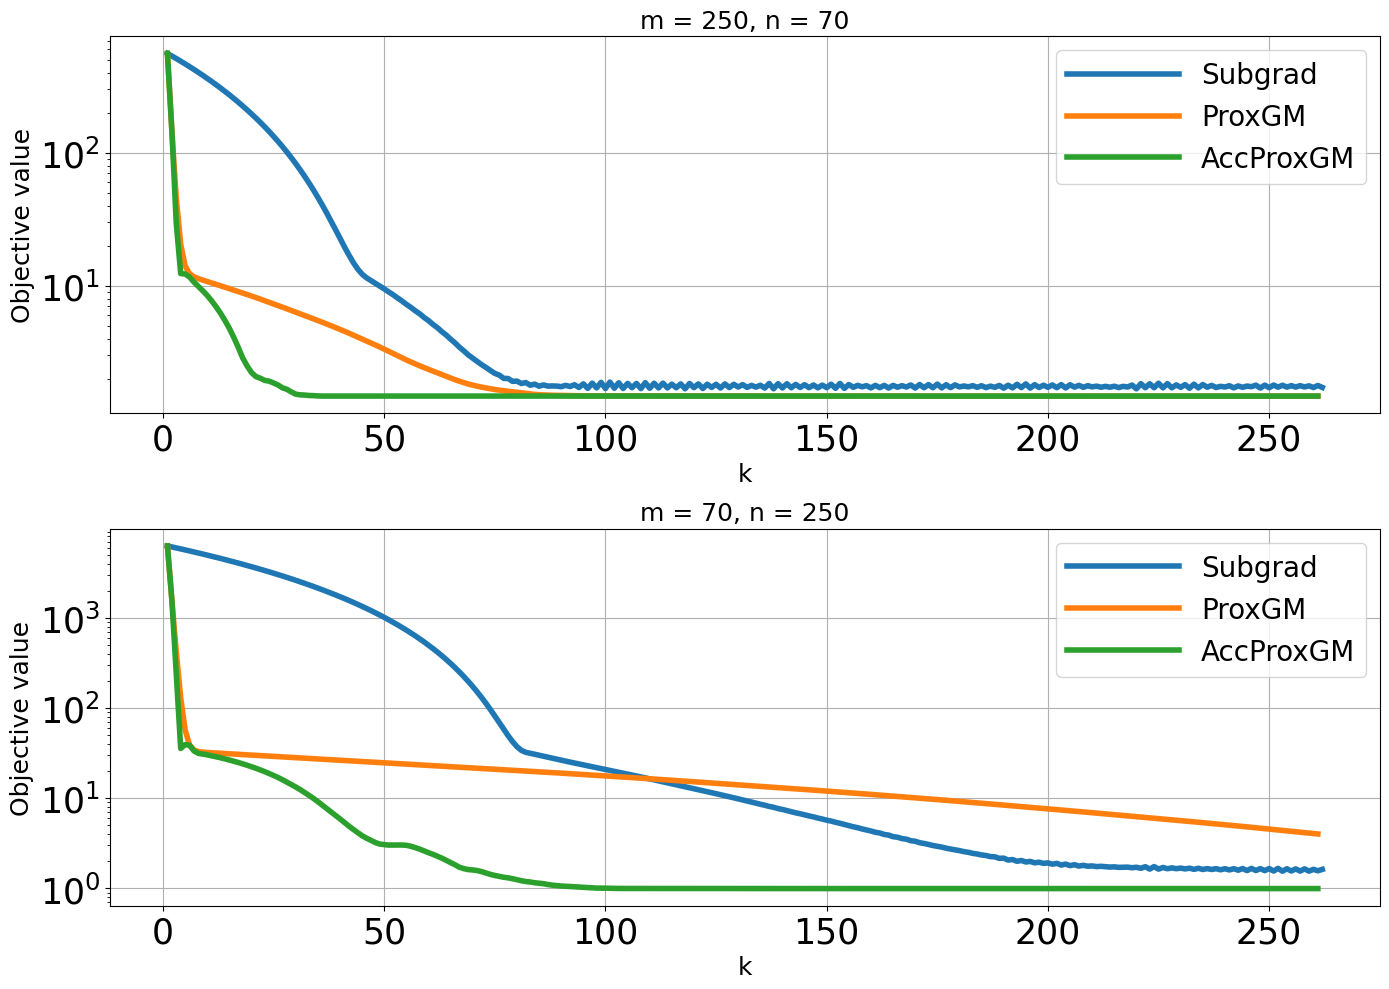

In [7]:
%matplotlib inline
configs = [
    (250, 70),
    (70, 250)
]
max_iters = 260

plt.figure(figsize=(14, 10))

for i, (m, n) in enumerate(configs):
    A = np.random.rand(m, n)
    A = skprep.normalize(A, norm="l2", axis=0)

    x_true = np.random.randn(n)
    x_true[np.random.rand(n) < 0.96] = 0  # sparse true solution

    v = 9e-2 * np.random.randn(m)
    y = A.dot(x_true) + v

    gamma_max = np.linalg.norm(A.T.dot(y), ord=np.inf)
    gamma = 0.9 * gamma_max

    x0 = np.random.rand(n)

    f  = lambda x: np.linalg.norm(A.dot(x) - y)**2 / 2
    gradf = lambda x: A.T.dot(A.dot(x) - y)

    F  = lambda x: f(x) + gamma * np.sum(np.abs(x))

    g_prox = lambda h, alpha: np.sign(h) * np.maximum(np.abs(h) - alpha * gamma, 0)

    L = 2 * np.linalg.norm(A, ord=2)**2 # constant-Lipshitz of smooth part

    # ---------------- Methods ----------------

    methods = []

    # 1) Subgradient
    method = SubgradMethod(ScaledConstantStepSize(1e-1), name="Subgrad")
    x_sub = method.solve(x0, F, lambda x: gradf(x) + gamma * np.sign(x), max_iter=max_iters)
    print("Number of nonzeros in x_true = {}".format(np.sum(x_true != 0)))
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_sub != 0)))
    methods.append(method)

    # 2) Proximal Gradient
    method = ProxGM(name="ProxGM", fix_lam=1.0/L)
    x_pg = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_pg != 0)))
    methods.append(method)

    # 3) Accelerated Proximal Gradient
    method = AccProxGM(name="AccProxGM", fix_lam=1.0/L)
    x_ag = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_ag != 0)))
    print(r"---")
    methods.append(method)

    # ---
    plt.subplot(2, 1, i+1)
    for method in methods:
        hist = [F(x) for x, _ in method.history]
        plt.semilogy(range(1, len(hist) + 1), hist, label=method.name)
        plt.grid()
        plt.title(f"m = {m}, n = {n}", fontsize=18)
        plt.xlabel("k", fontsize=18)
        plt.ylabel("Objective value", fontsize=18)
        plt.legend()

plt.tight_layout()

### Эксперимент LASSO. Изменение коэффициента регуляризации.

---
Number of nonzeros in x_true = 6
Method: Subgrad, m=70, n=250
	Number nonzeros in x* = 250
Method: ProxGM, m=70, n=250
	Number nonzeros in x* = 250
Method: AccProxGM, m=70, n=250
	Number nonzeros in x* = 244
---
---
Number of nonzeros in x_true = 6
Method: Subgrad, m=70, n=250
	Number nonzeros in x* = 250
Method: ProxGM, m=70, n=250
	Number nonzeros in x* = 225
Method: AccProxGM, m=70, n=250
	Number nonzeros in x* = 38
---
---
Number of nonzeros in x_true = 9
Method: Subgrad, m=70, n=250
	Number nonzeros in x* = 250
Method: ProxGM, m=70, n=250
	Number nonzeros in x* = 0
Method: AccProxGM, m=70, n=250
	Number nonzeros in x* = 0
---
---
Number of nonzeros in x_true = 11
Method: Subgrad, m=70, n=250
	Number nonzeros in x* = 250
Method: ProxGM, m=70, n=250
	Number nonzeros in x* = 0
Method: AccProxGM, m=70, n=250
	Number nonzeros in x* = 0
---


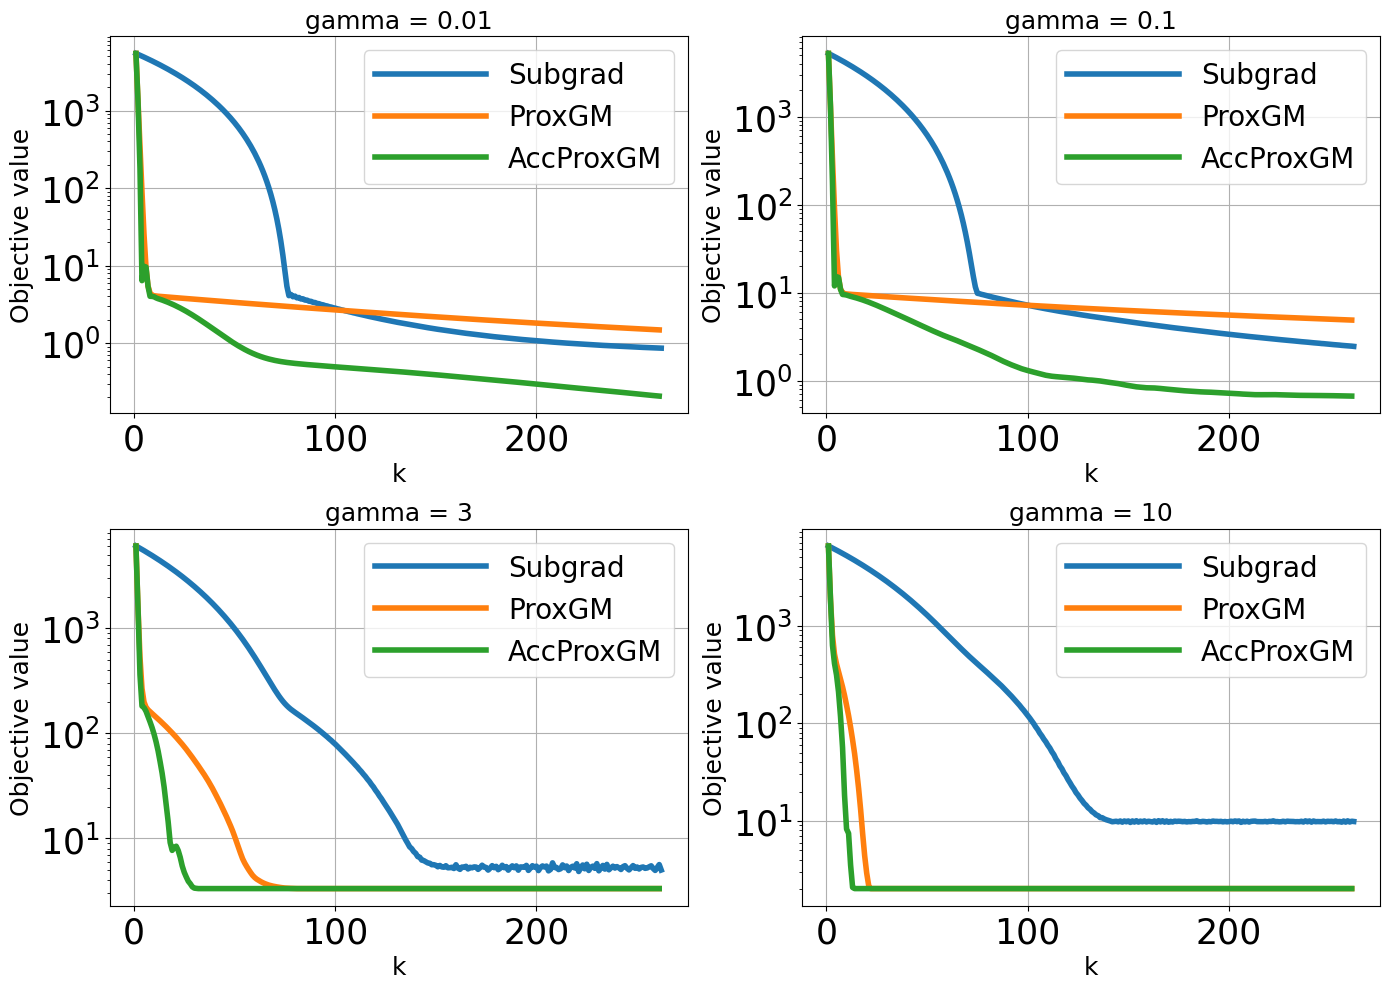

In [8]:
%matplotlib inline
gammas = [0.01, 0.1, 3, 10]
max_iters = 260

plt.figure(figsize=(14, 10))

for i, gamma in enumerate(gammas):
    A = np.random.rand(m, n)
    A = skprep.normalize(A, norm="l2", axis=0)

    x_true = np.random.randn(n)
    x_true[np.random.rand(n) < 0.96] = 0  # sparse true solution

    v = 9e-2 * np.random.randn(m)
    y = A.dot(x_true) + v

    x0 = np.random.rand(n)

    f  = lambda x: np.linalg.norm(A.dot(x) - y)**2 / 2
    gradf = lambda x: A.T.dot(A.dot(x) - y)

    F  = lambda x: f(x) + gamma * np.sum(np.abs(x))

    g_prox = lambda h, alpha: np.sign(h) * np.maximum(np.abs(h) - alpha * gamma, 0)

    L = 2 * np.linalg.norm(A, ord=2)**2 # constant-Lipshitz of smooth part

    # ---------------- Methods ----------------

    methods = []

    # 1) Subgradient
    method = SubgradMethod(ScaledConstantStepSize(1e-1), name="Subgrad")
    x_sub = method.solve(x0, F, 
                            lambda x: gradf(x) + gamma * np.sign(x),
                            max_iter=max_iters)
    print(r"---")
    print("Number of nonzeros in x_true = {}".format(np.sum(x_true != 0)))
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_sub != 0)))
    methods.append(method)

    # 2) Proximal Gradient
    method = ProxGM(name="ProxGM", fix_lam=1/L)
    x_pg = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_pg != 0)))
    methods.append(method)

    # 3) Accelerated Proximal Gradient
    method = AccProxGM(name="AccProxGM", fix_lam=1/L)
    x_ag = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_ag != 0)))
    print(r"---")
    methods.append(method)

    # ---
    plt.subplot(2, 2, i+1)
    for method in methods:
        hist = [F(x) for x, _ in method.history]
        plt.semilogy(range(1, len(hist) + 1), hist, label=method.name)
        plt.grid()
        plt.title(f"gamma = {gamma}", fontsize=18)
        plt.xlabel("k", fontsize=18)
        plt.ylabel("Objective value", fontsize=18)
        plt.legend()

plt.tight_layout()

### Эксперимент LASSO + Frank-Wolfe

Теперь решим эту задачу методом FW. Но для данного алгоритма нужно ввести ограничения, для этого вынесем негладкое слагаемое $h(x)$ в ограничения:

$$
\begin{aligned}
\min_{\mathbf{x} \in Q} \quad & f(\mathbf{x}) = \frac{1}{2}\|Ax - y \|^2_2 \\
\text{s. t.} \quad &  \|x\|_1 \leq \gamma  \\
\end{aligned}
$$

In [9]:
def lmo_l1_ball(radius=1.0):
    def f(g):
        if np.all(g == 0):
            return np.zeros_like(g)
        j = np.argmax(np.abs(g))
        s = np.zeros_like(g)
        s[j] = -radius * np.sign(g[j])
        return s

    return lambda g: f(g)

class SeqStepSize(StepSize):
    def __init__(self, d=1, alpha0=1, alpha_function=None):
        if alpha_function is not None:
            self.alpha_function = alpha_function
        else:
            self.alpha_function = lambda k: alpha0/(k+1)**d
    
    def __call__(self, x, h, k, *args, **kwargs):
        return self.alpha_function(k)

class FW_alg:
    def __init__(self, StepSizeChoice, lmo, return_history=True, name=None):
        self.name = name
        self.StepSizeChoice = StepSizeChoice
        self.return_history = return_history
        self.lmo = lmo
        self.history = []

    def __call__(self, x0, f, gradf, N):
        assert True, 'Please call solve method.'
    
    def solve(self, x0, f, gradf, tol=1e-9, max_iter=10000):
        x = x0.copy()
        self.history = [(x0, time.time())]
        for k in range(max_iters):
            g = gradf(x)
            s = self.lmo(g)
            alpha = self.StepSizeChoice(x, g, k, gradf, f)
            assert 0 <= alpha <= 1, f"alpha = {alpha}"
            x = x + alpha * (s - x)
            if np.linalg.norm(x - self.history[-1][0]) < tol and not k == 0:
                print("Function value did not decrease significantly.")
                break
            self.history.append((x, time.time()))
        return x

Меняем размерность матрицы

Number of nonzeros in x_true = 3
Method: ProxGM, m=250, n=70
	Number nonzeros in x* = 25
Method: AccProxGM, m=250, n=70
	Number nonzeros in x* = 7
FW, descending step size
	Number nonzeros in x* = 26
---
Number of nonzeros in x_true = 10
Method: ProxGM, m=70, n=250
	Number nonzeros in x* = 239
Method: AccProxGM, m=70, n=250
	Number nonzeros in x* = 190
FW, descending step size
	Number nonzeros in x* = 25
---


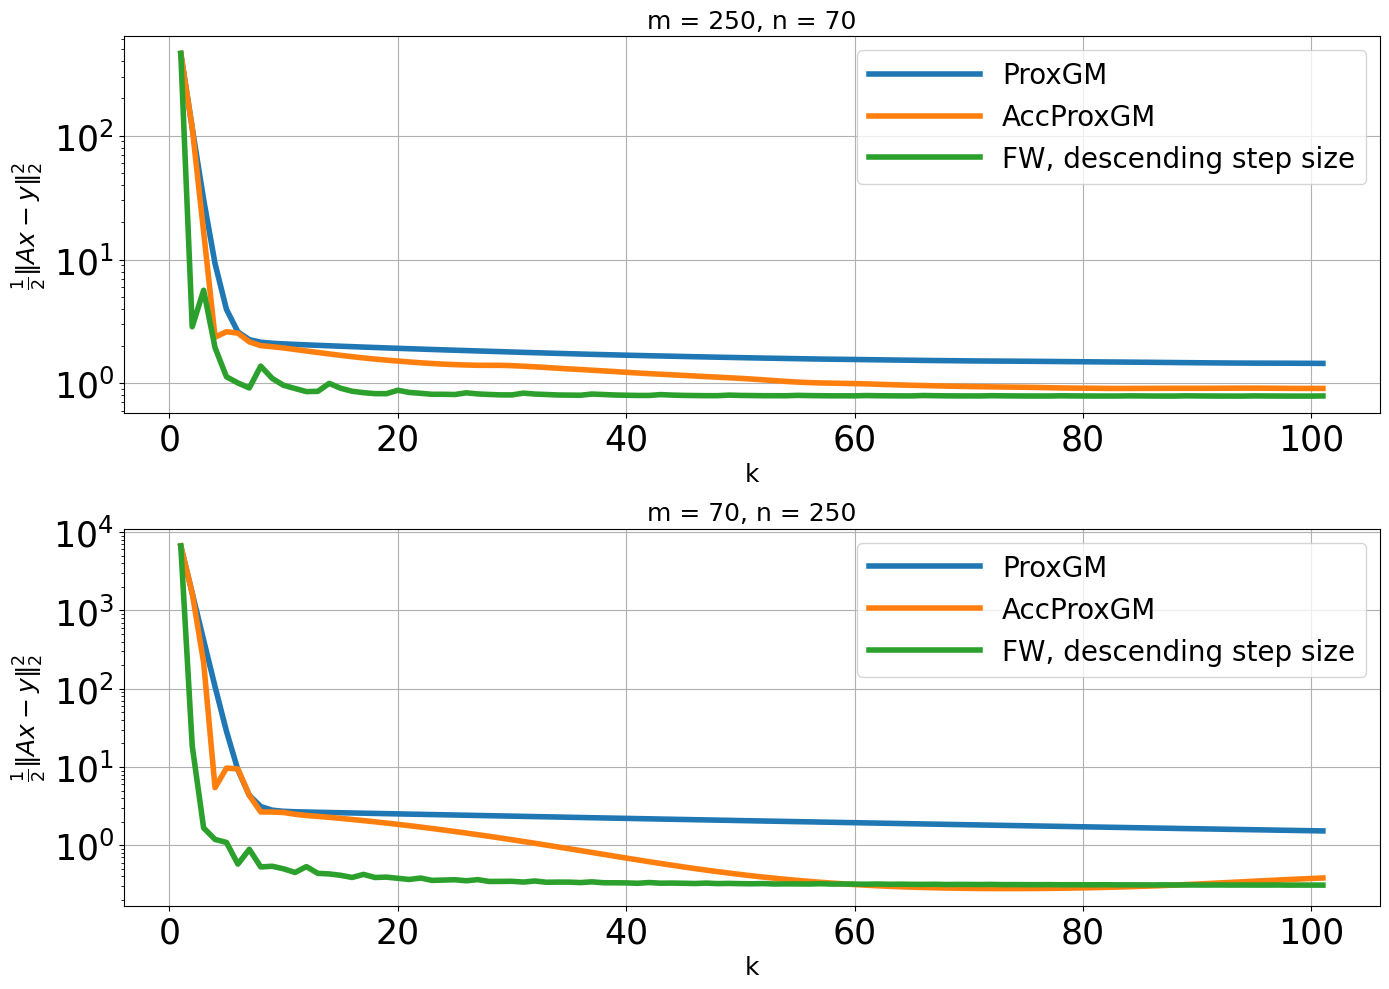

In [10]:
%matplotlib inline
configs = [
    (250, 70),
    (70, 250)
]
max_iters = 100

plt.figure(figsize=(14, 10))

for i, (m, n) in enumerate(configs):
    A = np.random.rand(m, n)
    A = skprep.normalize(A, norm="l2", axis=0)

    x_true = np.random.randn(n)
    x_true[np.random.rand(n) < 0.96] = 0  # sparse true solution
    print("Number of nonzeros in x_true = {}".format(np.sum(x_true != 0)))

    v = 9e-2 * np.random.randn(m)
    y = A.dot(x_true) + v

    gamma_max = np.linalg.norm(A.T.dot(y), ord=np.inf)
    gamma = 0.1 * gamma_max

    x0 = np.random.rand(n)

    f  = lambda x: np.linalg.norm(A.dot(x) - y)**2 / 2
    gradf = lambda x: A.T.dot(A.dot(x) - y)

    F  = lambda x: f(x) + gamma * np.sum(np.abs(x))

    g_prox = lambda h, alpha: np.sign(h) * np.maximum(np.abs(h) - alpha * gamma, 0)

    L = 2 * np.linalg.norm(A, ord=2)**2 # constant-Lipshitz of smooth part

    # ---------------- Methods ----------------

    methods = []

    # 1) Proximal Gradient
    method = ProxGM(name="ProxGM", fix_lam=1.0/L)
    x_pg = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_pg != 0)))
    methods.append(method)

    # 2) Accelerated Proximal Gradient
    method = AccProxGM(name="AccProxGM", fix_lam=1.0/L)
    x_ag = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_ag != 0)))
    methods.append(method)

    # 3) Frank-Wolfe
    method = FW_alg(SeqStepSize(d=1), lmo_l1_ball(radius=5.0), name="FW, descending step size")
    x_fw = method.solve(x0, f, gradf, tol=1e-9, max_iter=max_iters)
    methods.append(method)
    print(method.name)
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_fw != 0)))
    print(r"---")

    # ---
    plt.subplot(2, 1, i+1)
    for method in methods:
        hist = [f(x) for x, _ in method.history]
        plt.semilogy(range(1, len(hist) + 1), hist, label=method.name)
        plt.grid()
        plt.title(f"m = {m}, n = {n}", fontsize=18)
        plt.xlabel("k", fontsize=18)
        plt.ylabel(r"$\frac{1}{2}\|Ax - y \|^2_2$", fontsize=18)
        plt.legend()

plt.tight_layout()

Меняем коэффициент регуляризации

Number of nonzeros in x_true = 10
Method: ProxGM, m=500, n=250
	Number nonzeros in x* = 250
Method: AccProxGM, m=500, n=250
	Number nonzeros in x* = 250
FW, descending step size
	Number nonzeros in x* = 10
---
Number of nonzeros in x_true = 14
Method: ProxGM, m=500, n=250
	Number nonzeros in x* = 242
Method: AccProxGM, m=500, n=250
	Number nonzeros in x* = 212
FW, descending step size
	Number nonzeros in x* = 7
---
Number of nonzeros in x_true = 11
Method: ProxGM, m=500, n=250
	Number nonzeros in x* = 130
Method: AccProxGM, m=500, n=250
	Number nonzeros in x* = 6
FW, descending step size
	Number nonzeros in x* = 10
---
Number of nonzeros in x_true = 8
Method: ProxGM, m=500, n=250
	Number nonzeros in x* = 0
Method: AccProxGM, m=500, n=250
	Number nonzeros in x* = 0
FW, descending step size
	Number nonzeros in x* = 7
---


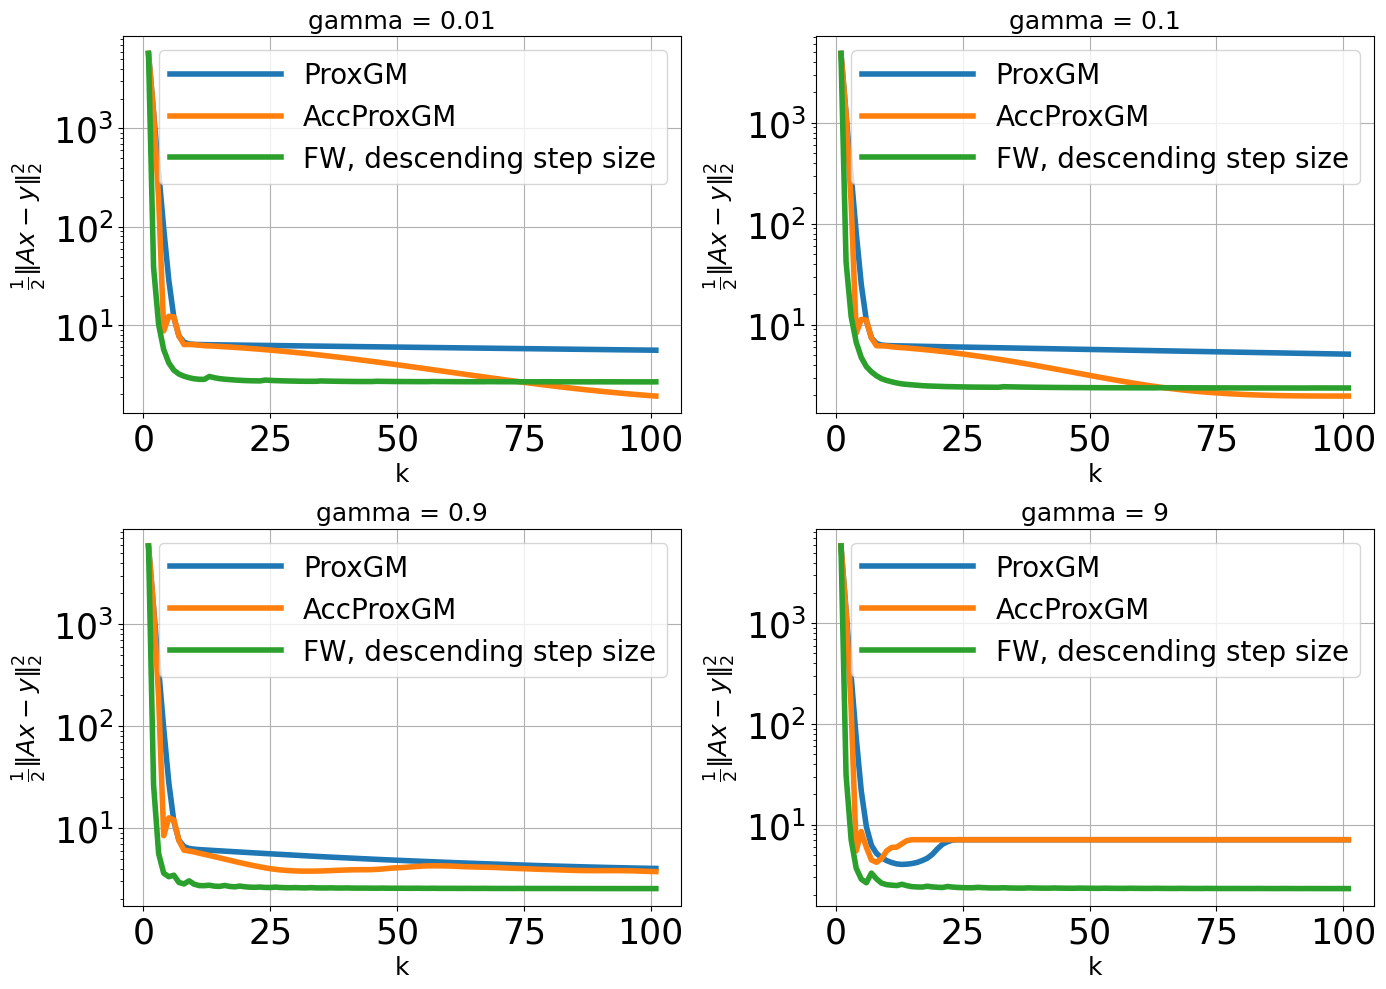

In [11]:
m = 500
n = 250

gammas = [0.01, 0.1, 0.9, 9]
max_iters = 100

plt.figure(figsize=(14, 10))

for i, gamma in enumerate(gammas):
    A = np.random.rand(m, n)
    A = skprep.normalize(A, norm="l2", axis=0)

    x_true = np.random.randn(n)
    x_true[np.random.rand(n) < 0.96] = 0  # sparse true solution
    print("Number of nonzeros in x_true = {}".format(np.sum(x_true != 0)))

    v = 9e-2 * np.random.randn(m)
    y = A.dot(x_true) + v

    x0 = np.random.rand(n)

    f  = lambda x: np.linalg.norm(A.dot(x) - y)**2 / 2
    gradf = lambda x: A.T.dot(A.dot(x) - y)

    F  = lambda x: f(x) + gamma * np.sum(np.abs(x))

    g_prox = lambda h, alpha: np.sign(h) * np.maximum(np.abs(h) - alpha * gamma, 0)

    L = 2 * np.linalg.norm(A, ord=2)**2

    # ---------------- Methods ----------------

    methods = []

    # 1) Proximal Gradient
    method = ProxGM(name="ProxGM", fix_lam=1.0/L)
    x_pg = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_pg != 0)))
    methods.append(method)

    # 2) Accelerated Proximal Gradient
    method = AccProxGM(name="AccProxGM", fix_lam=1.0/L)
    x_ag = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_ag != 0)))
    methods.append(method)

    # 3) Frank-Wolfe
    method = FW_alg(SeqStepSize(d=1.), lmo_l1_ball(radius=5.0), name="FW, descending step size")
    x_fw = method.solve(x0, f, gradf, tol=1e-9, max_iter=max_iters)
    methods.append(method)
    print(method.name)
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_fw != 0)))
    print(r"---")

    # ---
    plt.subplot(2, 2, i+1)
    for method in methods:
        hist = [f(x) for x, _ in method.history]
        plt.semilogy(range(1, len(hist) + 1), hist, label=method.name)
        plt.grid()
        plt.title(f"gamma = {gamma}", fontsize=18)
        plt.xlabel("k", fontsize=18)
        plt.ylabel(r"$\frac{1}{2}\|Ax - y \|^2_2$", fontsize=18)
        plt.legend()

plt.tight_layout()

### Эксперимент LASSO. Универсальный градиентный спуск

Применим идею адаптивности (backtracking linesearch) к проксимальному методу (2):
$$
x_{k+1} := \operatorname{prox}_{\lambda_k h}(x_k - \alpha_k \nabla \phi(x_k ))
$$
, где $\alpha_k = \frac{1}{L}$ и $L$ - константа Липшица градиента гладкой части исходной задачи (1).

На каждой итерации будем находить минимальное $L$ удовлетворяющее неравенству:

$$\phi(x_{k+1})\leq \phi(x_k) + \langle \nabla \phi_k, x_{k+1}-x_k \rangle + \frac{L}{2}\|x_{k+1} - x_k\|^2_2$$

Теоретические оценки представлены в работе Nesterov, Yu. "Universal gradient methods for convex optimization problems." Mathematical Programming 152.1 (2015): 381-404.

Сравним методы с постоянными шагами и с адаптивным

Method: ProxGM, m=250, n=70
	Number nonzeros in x* = 12
Method: AccProxGM, m=250, n=70
	Number nonzeros in x* = 4
---
Method: ProxGM, Adapt, m=250, n=70
	Number nonzeros in x* = 7
Method: AccProxGM, Adapt, m=250, n=70
	Number nonzeros in x* = 4
---
Method: ProxGM, m=70, n=250
	Number nonzeros in x* = 49
Method: AccProxGM, m=70, n=250
	Number nonzeros in x* = 2
---
Method: ProxGM, Adapt, m=70, n=250
	Number nonzeros in x* = 16
Method: AccProxGM, Adapt, m=70, n=250
	Number nonzeros in x* = 2
---


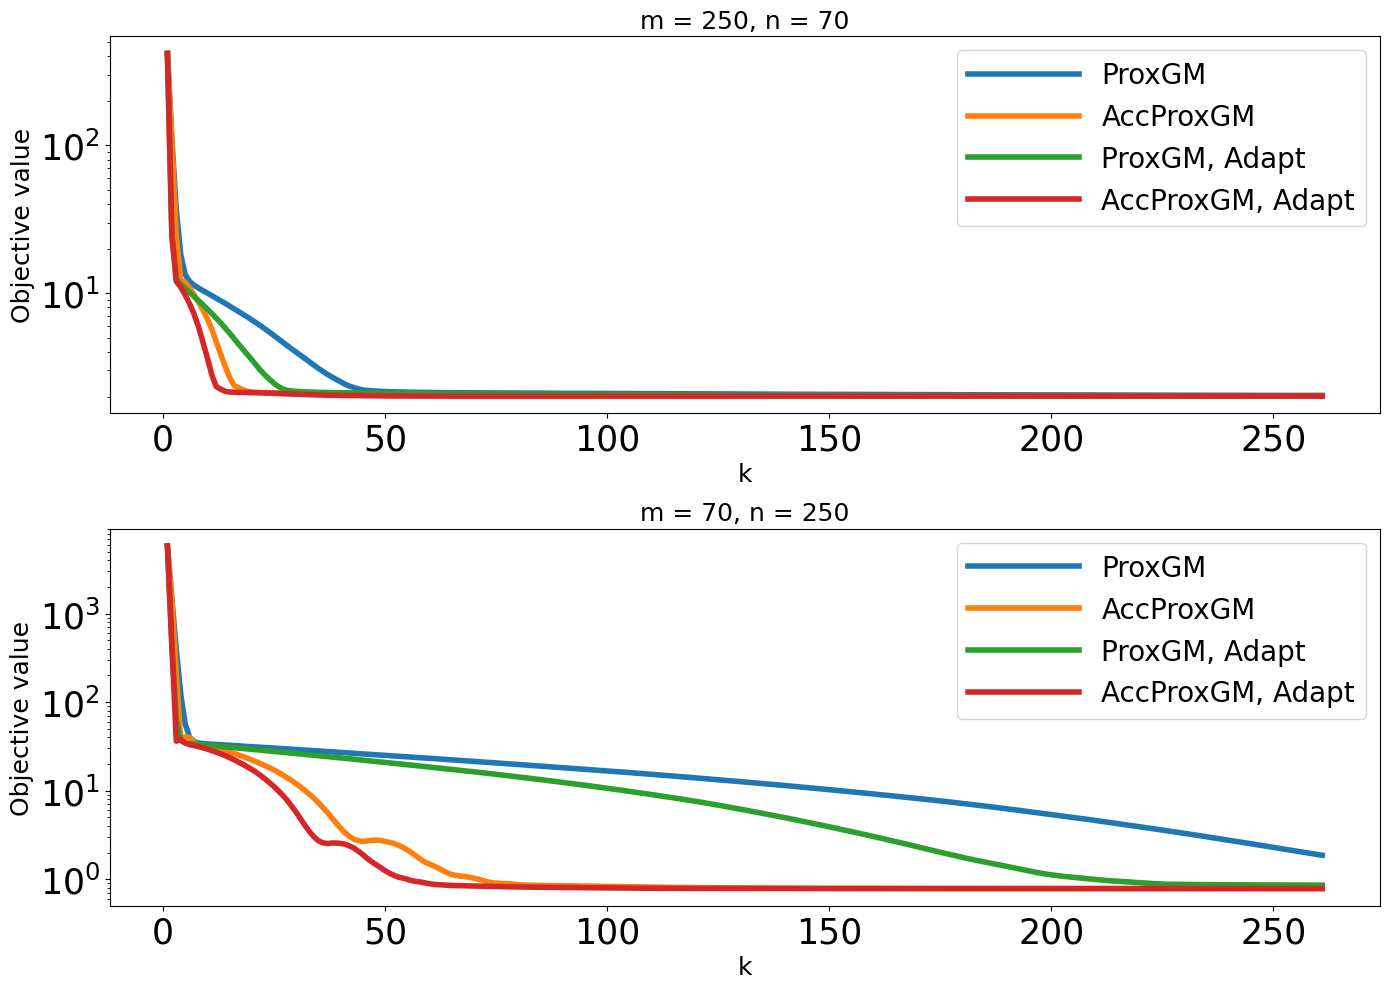

In [12]:
%matplotlib inline
configs = [
    (250, 70),
    (70, 250)
]
max_iters = 260

plt.figure(figsize=(14, 10))

for i, (m, n) in enumerate(configs):
    A = np.random.rand(m, n)
    A = skprep.normalize(A, norm="l2", axis=0)

    x_true = np.random.randn(n)
    x_true[np.random.rand(n) < 0.96] = 0  # sparse true solution

    v = 9e-2 * np.random.randn(m)
    y = A.dot(x_true) + v

    gamma_max = np.linalg.norm(A.T.dot(y), ord=np.inf)
    gamma = 0.5 * gamma_max

    x0 = np.random.rand(n)

    f  = lambda x: np.linalg.norm(A.dot(x) - y)**2 / 2
    gradf = lambda x: A.T.dot(A.dot(x) - y)

    F  = lambda x: f(x) + gamma * np.sum(np.abs(x))

    g_prox = lambda h, alpha: np.sign(h) * np.maximum(np.abs(h) - alpha * gamma, 0)

    L = 2 * np.linalg.norm(A, ord=2)**2 # constant-Lipshitz of smooth part

    # ---------------- Methods ----------------

    methods = []

    # 1) Proximal Gradient
    method = ProxGM(name="ProxGM", fix_lam=1.0/L)
    x_pg = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_pg != 0)))
    methods.append(method)

    # 2) Accelerated Proximal Gradient
    method = AccProxGM(name="AccProxGM", fix_lam=1.0/L)
    x_ag = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_ag != 0)))
    print(r"---")
    methods.append(method)

    # 3) Proximal Gradient
    method = ProxGM(name="ProxGM, Adapt",)
    x_pg = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_pg != 0)))
    methods.append(method)

    # 4) Accelerated Proximal Gradient
    method = AccProxGM(name="AccProxGM, Adapt",)
    x_ag = method.solve(x0, f, gradf, g_prox, max_iter=max_iters)
    print(r"Method: {}, m={}, n={}".format(method.name, m, n))
    print("\tNumber nonzeros in x* = {}".format(np.sum(x_ag != 0)))
    print(r"---")
    methods.append(method)

    # ---
    plt.subplot(2, 1, i+1)
    for method in methods:
        hist = [F(x) for x, _ in method.history]
        plt.semilogy(range(1, len(hist) + 1), hist, label=method.name)
        plt.grid()
        plt.title(f"m = {m}, n = {n}", fontsize=18)
        plt.xlabel("k", fontsize=18)
        plt.ylabel("Objective value", fontsize=18)
        plt.legend()

plt.tight_layout()

## Выводы

В экспериментах мы проверили техники ускорения субградиентного метода и на примере задачи LASSO мы убедились, что:
- проксимальный градиентный метод работает быстрее, чем субградиентный метод
- добавление процедуры backtracking linesearch ускоряетдает ускорение
- ускоренный проксимальынй метод так же увеличивает точность и скорость сходимости задачи

Так же мы сравнили структуру и точность решения задачи LASSO с методом Frank-Wolfe